# ***Engr.Muhammad Javed***

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
import datetime
import calendar

In [3]:
data = pd.read_csv("files/Real estate.csv")
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
data.drop("No", axis=1, inplace=True)
data.columns = [
    "TransactionDate",
    "House_Age",
    "DistanceToMRT",
    "NumConvenienceStores",
    "Latitude",
    "Longitude",
    "HousePricePerUnit",
]
data

,TransactionDate,House_Age,DistanceToMRT,NumConvenienceStores,Latitude,Longitude,HousePricePerUnit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [5]:
data["TransactionMonth"] = (
    data["TransactionDate"].astype(str).str.split(".").str[1].astype(int)
)
data.head()

,TransactionDate,House_Age,DistanceToMRT,NumConvenienceStores,Latitude,Longitude,HousePricePerUnit,TransactionMonth
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,917
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,917
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,583
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,5
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,833


Text(0, 0.5, 'House price per unit')

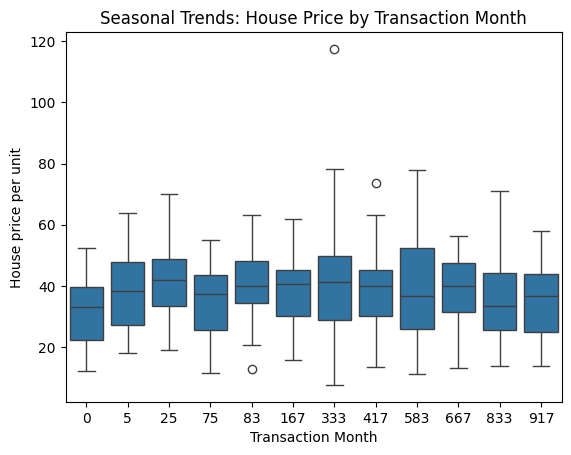

In [6]:
sbn.boxplot(data=data, x="TransactionMonth", y="HousePricePerUnit")
plt.title("Seasonal Trends: House Price by Transaction Month")
plt.xlabel("Transaction Month")
plt.ylabel("House price per unit")

In [7]:
monthly_avg = data.groupby("TransactionMonth")["HousePricePerUnit"].mean()
print("Average house price per month:\n",monthly_avg)

Average house price per month:
 TransactionMonth
0      31.057143
5      38.119149
25     41.293750
75     35.581481
83     40.493478
167    38.304000
333    41.562069
417    38.453448
583    39.604348
667    38.543333
833    35.683871
917    35.557895
Name: HousePricePerUnit, dtype: float64


## **Working with actual Month name**

In [8]:
# Step 1: Convert fractional year to datetime
def fractional_year_to_date(fractional_year):
    year =int(fractional_year)
    remainder = fractional_year-year
    base = datetime.datetime(year,1,1)
    result_date = base+datetime.timedelta(days=remainder*365)
    return result_date

data["TransactionDateTime"] = data["TransactionDate"].apply(fractional_year_to_date)
data["TransactionMonthName"] = data["TransactionDateTime"].dt.strftime("%B")
data["TransactionMonth"] = data["TransactionDateTime"].dt.month
data

,TransactionDate,House_Age,DistanceToMRT,NumConvenienceStores,Latitude,Longitude,HousePricePerUnit,TransactionMonth,TransactionDateTime,TransactionMonthName
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,11,2012-11-30 16:55:11.999997,November
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,11,2012-11-30 16:55:11.999997,November
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,8,2013-08-01 19:04:48.000003,August
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,7,2013-07-02 12:00:00.000000,July
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,10,2012-10-31 01:04:48.000003,October
...,...,...,...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,1,2013-01-01 00:00:00.000000,January
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,8,2012-08-31 10:55:11.999997,August
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,4,2013-04-02 06:00:00.000000,April
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,1,2013-01-01 00:00:00.000000,January


In [9]:
monthly_avg_name = data.groupby("TransactionMonthName")["HousePricePerUnit"].mean()
print(monthly_avg_name)

TransactionMonthName
April        41.293750
August       39.003774
January      36.922973
July         38.119149
June         38.453448
March        38.304000
May          41.562069
November     35.557895
October      35.683871
September    35.581481
Name: HousePricePerUnit, dtype: float64
